In [1]:
using Interpolations
using PyPlot
using PyCall
using CSV,DataFrames
using Pkg

pushfirst!(PyVector(pyimport("sys")["path"]), "")
@pyimport product_quad as pq
include("sweep2d.jl")
# using interpolations

(array([0.08151814, 0.08151814, 0.08151814, 0.08151814, 0.08151814,
       0.08151814, 0.08151814, 0.08151814, 0.04348186, 0.04348186,
       0.04348186, 0.04348186, 0.04348186, 0.04348186, 0.04348186,
       0.04348186]), array([ 0.86884614,  0.86884614,  0.35988786,  0.35988786, -0.35988786,
       -0.35988786, -0.86884614, -0.86884614,  0.46967645,  0.46967645,
        0.19454636,  0.19454636, -0.19454636, -0.19454636, -0.46967645,
       -0.46967645]), array([ 0.35988786, -0.35988786,  0.86884614, -0.86884614,  0.86884614,
       -0.86884614,  0.35988786, -0.35988786,  0.19454636, -0.19454636,
        0.46967645, -0.46967645,  0.46967645, -0.46967645,  0.19454636,
       -0.19454636]))
0.9999999999999999


RT_Solve_DMD (generic function with 1 method)

In [2]:
Nx = 300
Ny = 5
Lx = 0.001 
# Lx = 0.005
# Lx = 0.150
# Lx = 0.035
Ly = 100
hx = Lx/Nx
hy = Ly/Ny

dx = hx
#make x
x = range(-Lx/2+dx/2,stop=Lx/2-dx/2,length=Nx)#linspace(-Lx/2+dx/2,(Lx/2-dx/2),Nx)

Nord = 2
w,etax,etay = pq.prod_quad(Nord)
angles = length(w)
T0 = 80e-3
# T0=1

boundaryx = zeros(angles) .+  a * c * T0^4 * (etax .>= 0)/etax   #80e-3#+ 1/np.sum(w)
boundaryy = zeros(angles) .+ 0#+ 1/np.sum(w)

sigma = zeros((Nx,Ny,4)) .+ 1
Q = zeros((Nx,Ny,4,angles))
source_spots = findall(x-> abs.(x)<= 0.5,x)
Q[source_spots,:,:,:] .= 1.0/sum(w)*(a*c)*0 


psi_init = Q*0
Ti = 1.0e-10
T_init = zeros((Nx,Ny,4)) .+ Ti
psi_init = Q*0 .+ a*c*Ti^4
v = c
Tfinal = 2*5e-13 * 10^8
# Tfinal = 1
# Tfinal = 0.000005 / 10.
dt = Tfinal/1500 #hx/c
cv_val =  8310 * 1e-16 * (11604) * 1e3 
# cv_val = 0.3
println("cv = ", cv_val)
Cv(T,density) = cv_val  .+ 0.0*4*a*T.^3
eos(T,density) = cv_val .*T
inveos(e,density) = e/cv_val #(e/a).^.25
L2tol = 1e-6
Linftol = 1e-3
phi_sol = nothing
Q_func(t) = ifelse(t <= (10/c),Q.*0,0 .*Q)
n = 0
sigma0 = 107991.
# sigma0 = 300
sigma_func(T,density) = sigma0 * ( T ./ T0 ) .^ (-n) .* sigma     #107991
density = 0.01
# density = 3.0
K = 3
Rits = 3
psi,phi_sol, T, times, iteration = RT_Solve(Nx,Ny,hx,hy,psi_init,T_init,Nord,density,sigma_func,Q_func,Cv,
                        inveos,eos,v,dt,Tfinal,
             boundaryx, boundaryy,LOUD = 1);


cv = 9.642924e-6
Iteration: 1 L2 Diff: 0.28725029541926206 Linf Diff: 0.9999999996664065
Iteration: 2 L2 Diff: 0.0 Linf Diff: 0.0
Step 1: Initial Energy = 5.7857544e-12,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 2.667680482678552e-7
time = 6.666666666666665e-8
Iteration: 1 L2 Diff: 0.2167215061575949 Linf Diff: 0.836712329754598
Iteration: 2 L2 Diff: 0.00033912652368704884 Linf Diff: 0.003523836348024413
Iteration: 3 L2 Diff: 8.103732328705234e-6 Linf Diff: 0.00011008041566209856
Iteration: 4 L2 Diff: 2.4113536166717366e-7 Linf Diff: 3.431012431360086e-6
Iteration: 5 L2 Diff: 7.4498757004721115e-9 Linf Diff: 1.0689594276445184e-7
Step 2: Initial Energy = 8.429011506537725e-6,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 3.820225385705934e-7
time = 1.333333333333333e-7
Iteration: 1 L2 Diff: 0.1747179427674265 Linf Diff: 0.7122215928236488
Iteration: 2 L2 Diff: 0.0015132477393921457 Linf Diff: 0.018276429753440317
Iteration: 3 L2 Diff: 0.0001744698384

Iteration: 1 L2 Diff: 0.06137868979755506 Linf Diff: 0.22184064172345794
Iteration: 2 L2 Diff: 0.0027997539211975816 Linf Diff: 0.02431170438656608
Iteration: 3 L2 Diff: 0.0007158652698703302 Linf Diff: 0.005873143400708685
Iteration: 4 L2 Diff: 0.0002105277706637921 Linf Diff: 0.0017160718291089844
Iteration: 5 L2 Diff: 6.56018122380668e-5 Linf Diff: 0.0005401003839572313
Iteration: 6 L2 Diff: 2.101808821931339e-5 Linf Diff: 0.0001730165794726656
Iteration: 7 L2 Diff: 6.83154299570832e-6 Linf Diff: 5.609756005970866e-5
Iteration: 8 L2 Diff: 2.2379057458453755e-6 Linf Diff: 1.833270976889332e-5
Iteration: 9 L2 Diff: 7.363420507704852e-7 Linf Diff: 6.021224228271123e-6
Iteration: 10 L2 Diff: 2.428990292007929e-7 Linf Diff: 1.9838133498588008e-6
Iteration: 11 L2 Diff: 8.02465147161973e-8 Linf Diff: 6.548724749295393e-7
Iteration: 12 L2 Diff: 2.6534949917080298e-8 Linf Diff: 2.16436301121171e-7
Iteration: 13 L2 Diff: 8.779045912147566e-9 Linf Diff: 7.158497802842678e-8
Step 11: Initial En

Iteration: 11 L2 Diff: 1.5723633082381633e-7 Linf Diff: 1.1681218880856667e-6
Iteration: 12 L2 Diff: 5.877672613305757e-8 Linf Diff: 4.364015128925439e-7
Iteration: 13 L2 Diff: 2.2004094852711615e-8 Linf Diff: 1.6329901669427346e-7
Iteration: 14 L2 Diff: 8.245834682988488e-9 Linf Diff: 6.1173665060604e-8
Step 18: Initial Energy = 8.789860958313324e-5,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 2.2435607917709895e-6
time = 1.1999999999999997e-6
Iteration: 1 L2 Diff: 0.045861238808979736 Linf Diff: 0.1512685956145283
Iteration: 2 L2 Diff: 0.0022496751517429724 Linf Diff: 0.017644638439252167
Iteration: 3 L2 Diff: 0.0005963292736572194 Linf Diff: 0.004562766524808222
Iteration: 4 L2 Diff: 0.00018842150271143076 Linf Diff: 0.0013782628213643785
Iteration: 5 L2 Diff: 6.443842416504564e-5 Linf Diff: 0.0004694909736234224
Iteration: 6 L2 Diff: 2.2965144139614555e-5 Linf Diff: 0.00016655570473592812
Iteration: 7 L2 Diff: 8.377849111474896e-6 Linf Diff: 6.144866005088755e-5
I

Iteration: 10 L2 Diff: 4.718737715789202e-7 Linf Diff: 3.323978425444407e-6
Iteration: 11 L2 Diff: 1.8534969881987815e-7 Linf Diff: 1.312906626042314e-6
Iteration: 12 L2 Diff: 7.30605467422575e-8 Linf Diff: 5.194073109213259e-7
Iteration: 13 L2 Diff: 2.88698459853143e-8 Linf Diff: 2.0574495296979526e-7
Iteration: 14 L2 Diff: 1.1427861890635528e-8 Linf Diff: 8.157753061582208e-8
Iteration: 15 L2 Diff: 4.529263923535042e-9 Linf Diff: 3.236909582505341e-8
Step 25: Initial Energy = 0.0001092159305570486,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 2.682354772970078e-6
time = 1.6666666666666669e-6
Iteration: 1 L2 Diff: 0.039542802477377195 Linf Diff: 0.1285695199736416
Iteration: 2 L2 Diff: 0.0019463273766046135 Linf Diff: 0.015309693675122298
Iteration: 3 L2 Diff: 0.0005150805107804075 Linf Diff: 0.0036700042854080706
Iteration: 4 L2 Diff: 0.0001649395872438925 Linf Diff: 0.0011356053011582642
Iteration: 5 L2 Diff: 5.7771805679016476e-5 Linf Diff: 0.0003953795176290726
It

Iteration: 11 L2 Diff: 1.9162818198357915e-7 Linf Diff: 1.307160594430573e-6
Iteration: 12 L2 Diff: 7.785183239758635e-8 Linf Diff: 5.319357677792932e-7
Iteration: 13 L2 Diff: 3.173170817712169e-8 Linf Diff: 2.1698825768323993e-7
Iteration: 14 L2 Diff: 1.2964363644720889e-8 Linf Diff: 8.905906546480746e-8
Iteration: 15 L2 Diff: 5.306037639872041e-9 Linf Diff: 3.6579045310952066e-8
Step 32: Initial Energy = 0.00012764451405445785,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 3.0517136066020388e-6
time = 2.133333333333334e-6
Iteration: 1 L2 Diff: 0.03535210968616458 Linf Diff: 0.1140070530320385
Iteration: 2 L2 Diff: 0.0017317808587774726 Linf Diff: 0.013413777010867345
Iteration: 3 L2 Diff: 0.0004544803881775602 Linf Diff: 0.003162489998646942
Iteration: 4 L2 Diff: 0.00014597289315921932 Linf Diff: 0.0009629349654908647
Iteration: 5 L2 Diff: 5.166880149292619e-5 Linf Diff: 0.0003368586975126798
Iteration: 6 L2 Diff: 1.9301952634031362e-5 Linf Diff: 0.0001260429187661338

Iteration: 10 L2 Diff: 4.592939894126816e-7 Linf Diff: 3.0241293061020008e-6
Iteration: 11 L2 Diff: 1.8934242438185604e-7 Linf Diff: 1.2591031329709514e-6
Iteration: 12 L2 Diff: 7.847046381084091e-8 Linf Diff: 5.252531501366769e-7
Iteration: 13 L2 Diff: 3.264746993510691e-8 Linf Diff: 2.1949377450367432e-7
Iteration: 14 L2 Diff: 1.3622072362167084e-8 Linf Diff: 9.185735152169039e-8
Iteration: 15 L2 Diff: 5.696062419220792e-9 Linf Diff: 3.848928983645956e-8
Step 39: Initial Energy = 0.00014411172734591867,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 3.376366502614138e-6
time = 2.600000000000001e-6
Iteration: 1 L2 Diff: 0.032304291814912615 Linf Diff: 0.10366938150804803
Iteration: 2 L2 Diff: 0.0015681831776983423 Linf Diff: 0.011938052659890917
Iteration: 3 L2 Diff: 0.0004082746464017043 Linf Diff: 0.0027346759657474245
Iteration: 4 L2 Diff: 0.00013109510004315076 Linf Diff: 0.000833376488891982
Iteration: 5 L2 Diff: 4.663958042716287e-5 Linf Diff: 0.000292240946856971

Iteration: 9 L2 Diff: 1.0606297555481945e-6 Linf Diff: 6.732276878615576e-6
Iteration: 10 L2 Diff: 4.396853342991414e-7 Linf Diff: 2.8147031005862846e-6
Iteration: 11 L2 Diff: 1.837633298507226e-7 Linf Diff: 1.1844040486007e-6
Iteration: 12 L2 Diff: 7.725873482287872e-8 Linf Diff: 5.037999808709847e-7
Iteration: 13 L2 Diff: 3.2623980795125427e-8 Linf Diff: 2.1451681351266693e-7
Iteration: 14 L2 Diff: 1.3821357589949476e-8 Linf Diff: 9.142868752007894e-8
Iteration: 15 L2 Diff: 5.870087517254937e-9 Linf Diff: 3.9001376115463614e-8
Step 46: Initial Energy = 0.00015913526636687276,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 3.6692364331217837e-6
time = 3.066666666666668e-6
Iteration: 1 L2 Diff: 0.02995694660081264 Linf Diff: 0.09582218753225717
Iteration: 2 L2 Diff: 0.0014397090440049938 Linf Diff: 0.010503668695500751
Iteration: 3 L2 Diff: 0.0003715185065775292 Linf Diff: 0.002409958844868055
Iteration: 4 L2 Diff: 0.00011911610125672045 Linf Diff: 0.0007337971336303094


Iteration: 6 L2 Diff: 1.5050201409655323e-5 Linf Diff: 8.927126718776054e-5
Iteration: 7 L2 Diff: 5.959685977030762e-6 Linf Diff: 3.566057025245279e-5
Iteration: 8 L2 Diff: 2.4216074108600267e-6 Linf Diff: 1.4759422892828229e-5
Iteration: 9 L2 Diff: 1.0013775825903939e-6 Linf Diff: 6.169007399025234e-6
Iteration: 10 L2 Diff: 4.1920044790868723e-7 Linf Diff: 2.625670488220404e-6
Iteration: 11 L2 Diff: 1.7703799300436127e-7 Linf Diff: 1.1202098848595978e-6
Iteration: 12 L2 Diff: 7.524982204378747e-8 Linf Diff: 4.790496708540845e-7
Iteration: 13 L2 Diff: 3.2138288311195616e-8 Linf Diff: 2.0602080010031515e-7
Iteration: 14 L2 Diff: 1.3775524646382746e-8 Linf Diff: 8.911688928035957e-8
Iteration: 15 L2 Diff: 5.920950329681121e-9 Linf Diff: 3.856779926959886e-8
Step 53: Initial Energy = 0.0001730388174494532,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 3.938068911199255e-6
time = 3.5333333333333352e-6
Iteration: 1 L2 Diff: 0.028073110343222532 Linf Diff: 0.08958883166127983

Iteration: 6 L2 Diff: 1.3977178800579608e-5 Linf Diff: 8.092498978468997e-5
Iteration: 7 L2 Diff: 5.562062702187941e-6 Linf Diff: 3.2596517388563366e-5
Iteration: 8 L2 Diff: 2.2738626604451815e-6 Linf Diff: 1.3497212120533178e-5
Iteration: 9 L2 Diff: 9.468821282616522e-7 Linf Diff: 5.714884139763147e-6
Iteration: 10 L2 Diff: 3.9944652166945336e-7 Linf Diff: 2.4359630657547807e-6
Iteration: 11 L2 Diff: 1.700899069139511e-7 Linf Diff: 1.0540341256715595e-6
Iteration: 12 L2 Diff: 7.292565778653714e-8 Linf Diff: 4.567631820002109e-7
Iteration: 13 L2 Diff: 3.1427597916784584e-8 Linf Diff: 1.9824113437316957e-7
Iteration: 14 L2 Diff: 1.3596672742558104e-8 Linf Diff: 8.616662772005596e-8
Iteration: 15 L2 Diff: 5.900007453926014e-9 Linf Diff: 3.760726017528892e-8
Step 60: Initial Energy = 0.00018604069208477146,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 4.187916902838641e-6
time = 4.0000000000000015e-6
Iteration: 1 L2 Diff: 0.02651525803053873 Linf Diff: 0.08447472068977419

Iteration: 1 L2 Diff: 0.025373659684845163 Linf Diff: 0.08074299408109206
Iteration: 2 L2 Diff: 0.001185620723253683 Linf Diff: 0.008355240165293341
Iteration: 3 L2 Diff: 0.00029906704404273455 Linf Diff: 0.0018283515172015934
Iteration: 4 L2 Diff: 9.526241002317482e-5 Linf Diff: 0.0005459027360985855
Iteration: 5 L2 Diff: 3.409997124191529e-5 Linf Diff: 0.0001922160096036077
Iteration: 6 L2 Diff: 1.305856423983564e-5 Linf Diff: 7.359946897356052e-5
Iteration: 7 L2 Diff: 5.216859985004485e-6 Linf Diff: 2.9771683437619764e-5
Iteration: 8 L2 Diff: 2.1431886865918697e-6 Linf Diff: 1.2456526351779256e-5
Iteration: 9 L2 Diff: 8.975112162548458e-7 Linf Diff: 5.298479197179309e-6
Iteration: 10 L2 Diff: 3.809817614815893e-7 Linf Diff: 2.2826392511165616e-6
Iteration: 11 L2 Diff: 1.6331531776889386e-7 Linf Diff: 9.880143505488389e-7
Iteration: 12 L2 Diff: 7.051686489671644e-8 Linf Diff: 4.330924762832299e-7
Iteration: 13 L2 Diff: 3.061391302855702e-8 Linf Diff: 1.9002586576976175e-7
Iteration: 

Iteration: 4 L2 Diff: 8.92438857387946e-5 Linf Diff: 0.0005023243895102448
Iteration: 5 L2 Diff: 3.195959395650641e-5 Linf Diff: 0.00017617093728322184
Iteration: 6 L2 Diff: 1.2264345798088667e-5 Linf Diff: 6.796695437365014e-5
Iteration: 7 L2 Diff: 4.915250233505484e-6 Linf Diff: 2.757102887999574e-5
Iteration: 8 L2 Diff: 2.0274052141563148e-6 Linf Diff: 1.1541875936044082e-5
Iteration: 9 L2 Diff: 8.529773154294082e-7 Linf Diff: 4.926431753294596e-6
Iteration: 10 L2 Diff: 3.639448049961291e-7 Linf Diff: 2.139618281705058e-6
Iteration: 11 L2 Diff: 1.5687932126183918e-7 Linf Diff: 9.344500378207337e-7
Iteration: 12 L2 Diff: 6.813655474149499e-8 Linf Diff: 4.094644226648718e-7
Iteration: 13 L2 Diff: 2.976251938615717e-8 Linf Diff: 1.8138215817165207e-7
Iteration: 14 L2 Diff: 1.3057248308775224e-8 Linf Diff: 8.039585060234941e-8
Iteration: 15 L2 Diff: 5.747764843570252e-9 Linf Diff: 3.5658274998623193e-8
Step 74: Initial Energy = 0.00020992119948692227,
        Energy Added = 3.7109451823

Iteration: 12 L2 Diff: 6.616183888774682e-8 Linf Diff: 3.9291797309916136e-7
Iteration: 13 L2 Diff: 2.9030423425833504e-8 Linf Diff: 1.739519954660409e-7
Iteration: 14 L2 Diff: 1.2795741524379917e-8 Linf Diff: 7.76440077114017e-8
Iteration: 15 L2 Diff: 5.659844458759002e-9 Linf Diff: 3.4670637075784865e-8
Step 80: Initial Energy = 0.00021945080139769928,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 4.824693443860929e-6
time = 5.333333333333328e-6
Iteration: 1 L2 Diff: 0.023208679026831883 Linf Diff: 0.073734859326081
Iteration: 2 L2 Diff: 0.0010642030628130435 Linf Diff: 0.007279322295888778
Iteration: 3 L2 Diff: 0.00026492318136730586 Linf Diff: 0.0015654999035620354
Iteration: 4 L2 Diff: 8.403033805331427e-5 Linf Diff: 0.00046419707620683144
Iteration: 5 L2 Diff: 3.010160248048416e-5 Linf Diff: 0.00016325876397574343
Iteration: 6 L2 Diff: 1.1571215981143314e-5 Linf Diff: 6.278736170351959e-5
Iteration: 7 L2 Diff: 4.649847334942526e-6 Linf Diff: 2.5496699596402776e-5


Iteration: 10 L2 Diff: 3.3593744947567844e-7 Linf Diff: 1.90913513065868e-6
Iteration: 11 L2 Diff: 1.459895529142013e-7 Linf Diff: 8.418344379461377e-7
Iteration: 12 L2 Diff: 6.395730089118888e-8 Linf Diff: 3.743810198484278e-7
Iteration: 13 L2 Diff: 2.8191403227050653e-8 Linf Diff: 1.6667790312012163e-7
Iteration: 14 L2 Diff: 1.2484994680681146e-8 Linf Diff: 7.44054542916433e-8
Iteration: 15 L2 Diff: 5.5494908663641115e-9 Linf Diff: 3.3460838685721126e-8
Step 87: Initial Energy = 0.00023012412357548256,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 5.0268741359773625e-6
time = 5.799999999999992e-6
Iteration: 1 L2 Diff: 0.022319578527053123 Linf Diff: 0.07087160521963308
Iteration: 2 L2 Diff: 0.001014240149656797 Linf Diff: 0.006950937101284893
Iteration: 3 L2 Diff: 0.0002510158079541572 Linf Diff: 0.001457691121897394
Iteration: 4 L2 Diff: 7.946772234749268e-5 Linf Diff: 0.00043012445499726094
Iteration: 5 L2 Diff: 2.847306790802594e-5 Linf Diff: 0.0001514915406530086


Iteration: 2 L2 Diff: 0.000975918567653448 Linf Diff: 0.006775286453683581
Iteration: 3 L2 Diff: 0.00024042001335044928 Linf Diff: 0.0013773080678286653
Iteration: 4 L2 Diff: 7.598949919733764e-5 Linf Diff: 0.00040724008019358193
Iteration: 5 L2 Diff: 2.72292424826085e-5 Linf Diff: 0.00014308227339689786
Iteration: 6 L2 Diff: 1.0493434139153767e-5 Linf Diff: 5.514179254459977e-5
Iteration: 7 L2 Diff: 4.2334151535577265e-6 Linf Diff: 2.25219075134744e-5
Iteration: 8 L2 Diff: 1.760788613716089e-6 Linf Diff: 9.511523549282248e-6
Iteration: 9 L2 Diff: 7.480126954454835e-7 Linf Diff: 4.110111738002696e-6
Iteration: 10 L2 Diff: 3.226141637606915e-7 Linf Diff: 1.8056517889194974e-6
Iteration: 11 L2 Diff: 1.4069484778917017e-7 Linf Diff: 7.975809503233663e-7
Iteration: 12 L2 Diff: 6.186990926696711e-8 Linf Diff: 3.563797649937386e-7
Iteration: 13 L2 Diff: 2.7379438352817264e-8 Linf Diff: 1.5978638421337553e-7
Iteration: 14 L2 Diff: 1.2175502346510817e-8 Linf Diff: 7.17024352028221e-8
Iteration

Iteration: 14 L2 Diff: 1.19148164194985e-8 Linf Diff: 6.946535514251184e-8
Iteration: 15 L2 Diff: 5.33595465153526e-9 Linf Diff: 3.135807466885216e-8
Step 100: Initial Energy = 0.00024885584178222783,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 5.380567837343711e-6
time = 6.666666666666654e-6
Iteration: 1 L2 Diff: 0.020913870190716406 Linf Diff: 0.06636219871649564
Iteration: 2 L2 Diff: 0.0009358207026283512 Linf Diff: 0.006473132880845511
Iteration: 3 L2 Diff: 0.00022928626043516214 Linf Diff: 0.0012993221821841503
Iteration: 4 L2 Diff: 7.234191742380656e-5 Linf Diff: 0.0003815880676162759
Iteration: 5 L2 Diff: 2.5925111972783686e-5 Linf Diff: 0.00013403982673554696
Iteration: 6 L2 Diff: 1.0001972879295643e-5 Linf Diff: 5.1860707197913384e-5
Iteration: 7 L2 Diff: 4.0421369022428215e-6 Linf Diff: 2.1187560207529775e-5
Iteration: 8 L2 Diff: 1.68489775372765e-6 Linf Diff: 8.97009144876057e-6
Iteration: 9 L2 Diff: 7.175882007174157e-7 Linf Diff: 3.888576743127488e-6
Iter

Iteration: 15 L2 Diff: 5.220936982550615e-9 Linf Diff: 3.035637482444446e-8
Step 107: Initial Energy = 0.00025843491588794577,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 5.5609541984918185e-6
time = 7.133333333333318e-6
Iteration: 1 L2 Diff: 0.02026223037140451 Linf Diff: 0.06427202456359114
Iteration: 2 L2 Diff: 0.0008996580825496752 Linf Diff: 0.006149165364417835
Iteration: 3 L2 Diff: 0.00021926667835760826 Linf Diff: 0.001226254324381933
Iteration: 4 L2 Diff: 6.90706283074621e-5 Linf Diff: 0.0003590113997545018
Iteration: 5 L2 Diff: 2.4755776199528283e-5 Linf Diff: 0.0001262381221525374
Iteration: 6 L2 Diff: 9.56030836143117e-6 Linf Diff: 4.8740628225861636e-5
Iteration: 7 L2 Diff: 3.869541341736852e-6 Linf Diff: 1.998776767179503e-5
Iteration: 8 L2 Diff: 1.616040009373645e-6 Linf Diff: 8.47995337842625e-6
Iteration: 9 L2 Diff: 6.897925923211617e-7 Linf Diff: 3.6788231921064264e-6
Iteration: 10 L2 Diff: 2.9908779551666327e-7 Linf Diff: 1.621781258250363e-6
Iterat

Iteration: 10 L2 Diff: 2.901101188352492e-7 Linf Diff: 1.5567488850082768e-6
Iteration: 11 L2 Diff: 1.2751711113863226e-7 Linf Diff: 6.94624627639877e-7
Iteration: 12 L2 Diff: 5.654861153656644e-8 Linf Diff: 3.1320851747429737e-7
Iteration: 13 L2 Diff: 2.524796535551971e-8 Linf Diff: 1.4136006635055397e-7
Iteration: 14 L2 Diff: 1.1332498519999371e-8 Linf Diff: 6.436239945069937e-8
Iteration: 15 L2 Diff: 5.107766629014212e-9 Linf Diff: 2.935805100832296e-8
Step 114: Initial Energy = 0.00026770366712159174,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 5.735223823097198e-6
time = 7.599999999999982e-6
Iteration: 1 L2 Diff: 0.019668666262284685 Linf Diff: 0.06236688909485397
Iteration: 2 L2 Diff: 0.0008665343016370106 Linf Diff: 0.005774009834029258
Iteration: 3 L2 Diff: 0.00021018490008523736 Linf Diff: 0.0011563834111573347
Iteration: 4 L2 Diff: 6.61199114360215e-5 Linf Diff: 0.00033972471571280176
Iteration: 5 L2 Diff: 2.3701225456052718e-5 Linf Diff: 0.00011923076304229

Iteration: 10 L2 Diff: 2.803610507342039e-7 Linf Diff: 1.4842457245499871e-6
Iteration: 11 L2 Diff: 1.235000292094978e-7 Linf Diff: 6.637163478088127e-7
Iteration: 12 L2 Diff: 5.4895358299909284e-8 Linf Diff: 3.0017180502484353e-7
Iteration: 13 L2 Diff: 2.4570692023640676e-8 Linf Diff: 1.3618529155428973e-7
Iteration: 14 L2 Diff: 1.1057274820027374e-8 Linf Diff: 6.192338222790057e-8
Iteration: 15 L2 Diff: 4.997258037297494e-9 Linf Diff: 2.837569296221515e-8
Step 121: Initial Energy = 0.0002766904310542793,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 5.903960335481708e-6
time = 8.066666666666652e-6
Iteration: 1 L2 Diff: 0.01912413992497908 Linf Diff: 0.06063924852831224
Iteration: 2 L2 Diff: 0.0008360368386468849 Linf Diff: 0.0055450428328766375
Iteration: 3 L2 Diff: 0.0002019458624941079 Linf Diff: 0.00110285229173709
Iteration: 4 L2 Diff: 6.344834753611056e-5 Linf Diff: 0.00032108264540628846
Iteration: 5 L2 Diff: 2.2745540802297526e-5 Linf Diff: 0.000112965414677666

Iteration: 4 L2 Diff: 6.135265832496794e-5 Linf Diff: 0.0003081234815247821
Iteration: 5 L2 Diff: 2.1994578652632615e-5 Linf Diff: 0.0001080618562421327
Iteration: 6 L2 Diff: 8.513239061077754e-6 Linf Diff: 4.189087065506199e-5
Iteration: 7 L2 Diff: 3.4577368634463084e-6 Linf Diff: 1.718466098135969e-5
Iteration: 8 L2 Diff: 1.4503459948573361e-6 Linf Diff: 7.324192106328368e-6
Iteration: 9 L2 Diff: 6.222034742396577e-7 Linf Diff: 3.1957798907142348e-6
Iteration: 10 L2 Diff: 2.713135583467923e-7 Linf Diff: 1.4155829387748966e-6
Iteration: 11 L2 Diff: 1.197478000702674e-7 Linf Diff: 6.366882590708097e-7
Iteration: 12 L2 Diff: 5.3339445093304165e-8 Linf Diff: 2.8772114378466364e-7
Iteration: 13 L2 Diff: 2.3927673795414908e-8 Linf Diff: 1.3116875608428445e-7
Iteration: 14 L2 Diff: 1.079324493404443e-8 Linf Diff: 5.98338523788062e-8
Iteration: 15 L2 Diff: 4.889907422665309e-9 Linf Diff: 2.7417706786477308e-8
Step 128: Initial Energy = 0.0002854194772025554,
        Energy Added = 3.71094518

Step 134: Initial Energy = 0.00029271237094628295,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.2042795820692245e-6
time = 8.933333333333325e-6
Iteration: 1 L2 Diff: 0.018226880240923667 Linf Diff: 0.057781699237071264
Iteration: 2 L2 Diff: 0.0007867407195749752 Linf Diff: 0.005206535145909848
Iteration: 3 L2 Diff: 0.00018853936389185837 Linf Diff: 0.001006897759535041
Iteration: 4 L2 Diff: 5.909342098500227e-5 Linf Diff: 0.00029281323115655815
Iteration: 5 L2 Diff: 2.1186548249776805e-5 Linf Diff: 0.00010296514056957151
Iteration: 6 L2 Diff: 8.205923268651986e-6 Linf Diff: 3.989713035696875e-5
Iteration: 7 L2 Diff: 3.3362235613025976e-6 Linf Diff: 1.638502322497698e-5
Iteration: 8 L2 Diff: 1.4010982547464305e-6 Linf Diff: 6.9767951726378875e-6
Iteration: 9 L2 Diff: 6.019344805494417e-7 Linf Diff: 3.0480309615183137e-6
Iteration: 10 L2 Diff: 2.62896063416211e-7 Linf Diff: 1.3570182363533213e-6
Iteration: 11 L2 Diff: 1.1623687856681293e-7 Linf Diff: 6.108137695417667e

Iteration: 10 L2 Diff: 2.550465081970634e-7 Linf Diff: 1.302426032604639e-6
Iteration: 11 L2 Diff: 1.1294609905446963e-7 Linf Diff: 5.861503305596981e-7
Iteration: 12 L2 Diff: 5.049230438511835e-8 Linf Diff: 2.6652799801515287e-7
Iteration: 13 L2 Diff: 2.2738115504900867e-8 Linf Diff: 1.2169961010220405e-7
Iteration: 14 L2 Diff: 1.0298534662475344e-8 Linf Diff: 5.5975067348151547e-8
Iteration: 15 L2 Diff: 4.685698630578253e-9 Linf Diff: 2.575490813971444e-8
Step 142: Initial Energy = 0.00030218562115179385,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.3815717913781704e-6
time = 9.466666666666662e-6
Iteration: 1 L2 Diff: 0.017734123827266943 Linf Diff: 0.056214489721131466
Iteration: 2 L2 Diff: 0.0007595125282960013 Linf Diff: 0.004892229774440481
Iteration: 3 L2 Diff: 0.0001812260949457728 Linf Diff: 0.0009595434997679526
Iteration: 4 L2 Diff: 5.673517579848056e-5 Linf Diff: 0.00027812981872656225
Iteration: 5 L2 Diff: 2.034315018888427e-5 Linf Diff: 9.75652737711529

Step 148: Initial Energy = 0.00030911581387015703,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.511155858081364e-6
time = 9.866666666666665e-6
Iteration: 1 L2 Diff: 0.017388598606268874 Linf Diff: 0.055123159181056966
Iteration: 2 L2 Diff: 0.0007403617444635684 Linf Diff: 0.0048647316551333536
Iteration: 3 L2 Diff: 0.00017618058961620388 Linf Diff: 0.0009235245647256975
Iteration: 4 L2 Diff: 5.5107932889491994e-5 Linf Diff: 0.00026749730740421136
Iteration: 5 L2 Diff: 1.9760294011759926e-5 Linf Diff: 9.398423195800954e-5
Iteration: 6 L2 Diff: 7.662247582702953e-6 Linf Diff: 3.645459526183662e-5
Iteration: 7 L2 Diff: 3.120509335601878e-6 Linf Diff: 1.4975410482543306e-5
Iteration: 8 L2 Diff: 1.3132803864395538e-6 Linf Diff: 6.404941374087251e-6
Iteration: 9 L2 Diff: 5.655950528547893e-7 Linf Diff: 2.8060657000537593e-6
Iteration: 10 L2 Diff: 2.477087439389842e-7 Linf Diff: 1.2503129520727935e-6
Iteration: 11 L2 Diff: 1.0985579118244093e-7 Linf Diff: 5.63419084686898e-

Iteration: 12 L2 Diff: 4.8127372419167764e-8 Linf Diff: 2.4912464636679323e-7
Iteration: 13 L2 Diff: 2.173844522535395e-8 Linf Diff: 1.1422970993522475e-7
Iteration: 14 L2 Diff: 9.877175435330071e-9 Linf Diff: 5.261636494325929e-8
Step 155: Initial Energy = 0.00031702505558604257,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.658930990898059e-6
time = 1.0333333333333335e-5
Iteration: 1 L2 Diff: 0.01701332194108688 Linf Diff: 0.05393465295600325
Iteration: 2 L2 Diff: 0.0007200779845005686 Linf Diff: 0.004700464519563241
Iteration: 3 L2 Diff: 0.00017070293363413952 Linf Diff: 0.0008874146470015136
Iteration: 4 L2 Diff: 5.333787458262555e-5 Linf Diff: 0.00025661795021211055
Iteration: 5 L2 Diff: 1.9126689473306166e-5 Linf Diff: 8.988952136777506e-5
Iteration: 6 L2 Diff: 7.4203259723405645e-6 Linf Diff: 3.488925580931245e-5
Iteration: 7 L2 Diff: 3.024244102736056e-6 Linf Diff: 1.4376143455397424e-5
Iteration: 8 L2 Diff: 1.2739384334481678e-6 Linf Diff: 6.1387955507605e-6


Iteration: 13 L2 Diff: 2.1237839591161343e-8 Linf Diff: 1.1059765963043453e-7
Iteration: 14 L2 Diff: 9.664419644511617e-9 Linf Diff: 5.092452651628776e-8
Step 162: Initial Energy = 0.00032475691468136856,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.8032817488958695e-6
time = 1.0800000000000005e-5
Iteration: 1 L2 Diff: 0.016660374405506374 Linf Diff: 0.05280768084150177
Iteration: 2 L2 Diff: 0.000700720016589424 Linf Diff: 0.00445194804308334
Iteration: 3 L2 Diff: 0.0001655627412623596 Linf Diff: 0.0008536644186460481
Iteration: 4 L2 Diff: 5.169137197395669e-5 Linf Diff: 0.0002461042837769441
Iteration: 5 L2 Diff: 1.8538129513768407e-5 Linf Diff: 8.643394941933662e-5
Iteration: 6 L2 Diff: 7.195425469475455e-6 Linf Diff: 3.353815860190817e-5
Iteration: 7 L2 Diff: 2.934601163902239e-6 Linf Diff: 1.3813967710531936e-5
Iteration: 8 L2 Diff: 1.2372193573247802e-6 Linf Diff: 5.907139625449116e-6
Iteration: 9 L2 Diff: 5.339287648629321e-7 Linf Diff: 2.5913273929018677e-6
It

Iteration: 5 L2 Diff: 1.7990579757612766e-5 Linf Diff: 8.300145906509207e-5
Iteration: 6 L2 Diff: 6.985863428010112e-6 Linf Diff: 3.224938004578248e-5
Iteration: 7 L2 Diff: 2.8509183709248914e-6 Linf Diff: 1.3272758567155367e-5
Iteration: 8 L2 Diff: 1.2028660519469002e-6 Linf Diff: 5.689807302945348e-6
Iteration: 9 L2 Diff: 5.195689099706407e-7 Linf Diff: 2.4993957982407746e-6
Iteration: 10 L2 Diff: 2.28307017157376e-7 Linf Diff: 1.118073035368385e-6
Iteration: 11 L2 Diff: 1.0162293232671988e-7 Linf Diff: 5.063221187334615e-7
Iteration: 12 L2 Diff: 4.5683262887052875e-8 Linf Diff: 2.3131317182662963e-7
Iteration: 13 L2 Diff: 2.0695247297993854e-8 Linf Diff: 1.066076974751457e-7
Iteration: 14 L2 Diff: 9.43258679550307e-9 Linf Diff: 4.9271679924470936e-8
Step 170: Initial Energy = 0.0003333907259197123,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 6.964355872121327e-6
time = 1.1333333333333342e-5
Iteration: 1 L2 Diff: 0.016281815703350286 Linf Diff: 0.051615233498043415


Iteration: 11 L2 Diff: 9.91773980904632e-8 Linf Diff: 4.888750489137422e-7
Iteration: 12 L2 Diff: 4.463422609720217e-8 Linf Diff: 2.241551062745592e-7
Iteration: 13 L2 Diff: 2.024457138694902e-8 Linf Diff: 1.032600326300342e-7
Iteration: 14 L2 Diff: 9.239098317404023e-9 Linf Diff: 4.787176882124529e-8
Step 177: Initial Energy = 0.00034077945516948455,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.102107724658974e-6
time = 1.1800000000000012e-5
Iteration: 1 L2 Diff: 0.01597339278767302 Linf Diff: 0.05064355128589027
Iteration: 2 L2 Diff: 0.0006635151886627212 Linf Diff: 0.004262835060683554
Iteration: 3 L2 Diff: 0.0001557467092059775 Linf Diff: 0.0007889345124051265
Iteration: 4 L2 Diff: 4.853666207975676e-5 Linf Diff: 0.00022672486607629058
Iteration: 5 L2 Diff: 1.7408512300102452e-5 Linf Diff: 7.95713710352231e-5
Iteration: 6 L2 Diff: 6.762951457447091e-6 Linf Diff: 3.0872425548467495e-5
Iteration: 7 L2 Diff: 2.761777908445363e-6 Linf Diff: 1.2736812139980442e-5
Iter

Iteration: 5 L2 Diff: 1.6933593469397203e-5 Linf Diff: 7.670092955823024e-5
Iteration: 6 L2 Diff: 6.580974010863627e-6 Linf Diff: 2.9806706236836755e-5
Iteration: 7 L2 Diff: 2.688908597296094e-6 Linf Diff: 1.229094842177652e-5
Iteration: 8 L2 Diff: 1.1361717289658079e-6 Linf Diff: 5.264847919766447e-6
Iteration: 9 L2 Diff: 4.915943954513569e-7 Linf Diff: 2.3146408541798204e-6
Iteration: 10 L2 Diff: 2.1642906521023446e-7 Linf Diff: 1.0370416963359145e-6
Iteration: 11 L2 Diff: 9.654074132541996e-8 Linf Diff: 4.7143642559471945e-7
Iteration: 12 L2 Diff: 4.349932559275194e-8 Linf Diff: 2.1629259645896415e-7
Iteration: 13 L2 Diff: 1.9755123363502565e-8 Linf Diff: 9.961337906372322e-8
Iteration: 14 L2 Diff: 9.028048904103963e-9 Linf Diff: 4.632732312255511e-8
Step 185: Initial Energy = 0.00034904637839389965,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.256134503152163e-6
time = 1.233333333333335e-5
Iteration: 1 L2 Diff: 0.015641126159149813 Linf Diff: 0.049582530855796926

Iteration: 5 L2 Diff: 1.6488255282079196e-5 Linf Diff: 7.404553984813248e-5
Iteration: 6 L2 Diff: 6.410086030452029e-6 Linf Diff: 2.8765741277396026e-5
Iteration: 7 L2 Diff: 2.620377181507903e-6 Linf Diff: 1.1860303177396787e-5
Iteration: 8 L2 Diff: 1.1078819850324458e-6 Linf Diff: 5.092778194343803e-6
Iteration: 9 L2 Diff: 4.796899956556452e-7 Linf Diff: 2.2410896852878855e-6
Iteration: 10 L2 Diff: 2.113555761206317e-7 Linf Diff: 1.0051387250165691e-6
Iteration: 11 L2 Diff: 9.436072468232329e-8 Linf Diff: 4.570954588597627e-7
Iteration: 12 L2 Diff: 4.2558022112451396e-8 Linf Diff: 2.0969322665761067e-7
Iteration: 13 L2 Diff: 1.934773083359524e-8 Linf Diff: 9.68699477314401e-8
Iteration: 14 L2 Diff: 8.85168320947303e-9 Linf Diff: 4.502537043120681e-8
Step 192: Initial Energy = 0.0003561339525347242,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.388115140522754e-6
time = 1.280000000000002e-5
Iteration: 1 L2 Diff: 0.015364625353957674 Linf Diff: 0.048717404213899404
Ite

Iteration: 5 L2 Diff: 1.6068836247993865e-5 Linf Diff: 7.162674035860566e-5
Iteration: 6 L2 Diff: 6.249114745820444e-6 Linf Diff: 2.781496389652021e-5
Iteration: 7 L2 Diff: 2.5557620181889047e-6 Linf Diff: 1.1482974449693877e-5
Iteration: 8 L2 Diff: 1.0811718597453382e-6 Linf Diff: 4.926614536402663e-6
Iteration: 9 L2 Diff: 4.684307926816336e-7 Linf Diff: 2.1710937877958017e-6
Iteration: 10 L2 Diff: 2.0654721532745716e-7 Linf Diff: 9.74484140813562e-7
Iteration: 11 L2 Diff: 9.228975208607098e-8 Linf Diff: 4.4328253051392565e-7
Iteration: 12 L2 Diff: 4.166140745538259e-8 Linf Diff: 2.0335364799688782e-7
Iteration: 13 L2 Diff: 1.8958509378932587e-8 Linf Diff: 9.421387107549321e-8
Iteration: 14 L2 Diff: 8.682613611787913e-9 Linf Diff: 4.376969804145417e-8
Step 199: Initial Energy = 0.0003630930445490972,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.517637832690899e-6
time = 1.326666666666669e-5
Iteration: 1 L2 Diff: 0.015105959311244258 Linf Diff: 0.04789800942902325
It

Iteration: 9 L2 Diff: 4.5776596059628055e-7 Linf Diff: 2.103609444427543e-6
Iteration: 10 L2 Diff: 2.019837417767114e-7 Linf Diff: 9.449488002023392e-7
Iteration: 11 L2 Diff: 9.031987512784099e-8 Linf Diff: 4.299964311847344e-7
Iteration: 12 L2 Diff: 4.0806424346360545e-8 Linf Diff: 1.9761891203125892e-7
Iteration: 13 L2 Diff: 1.8586318733037947e-8 Linf Diff: 9.164628193036587e-8
Iteration: 14 L2 Diff: 8.520434644794746e-9 Linf Diff: 4.2592128063784e-8
Step 206: Initial Energy = 0.0003699303982924619,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.644835208186759e-6
time = 1.373333333333336e-5
Iteration: 1 L2 Diff: 0.014857438018917903 Linf Diff: 0.047110297081615495
Iteration: 2 L2 Diff: 0.0006034303004780897 Linf Diff: 0.0037594721071657865
Iteration: 3 L2 Diff: 0.00014006823622993235 Linf Diff: 0.000687013589281572
Iteration: 4 L2 Diff: 4.3534411830342195e-5 Linf Diff: 0.00019656104960865805
Iteration: 5 L2 Diff: 1.5618943055192773e-5 Linf Diff: 6.889816299541529e-5

Iteration: 5 L2 Diff: 1.5248771462950681e-5 Linf Diff: 6.685262971289262e-5
Iteration: 6 L2 Diff: 5.93396121917694e-6 Linf Diff: 2.596366691464142e-5
Iteration: 7 L2 Diff: 2.429031820843047e-6 Linf Diff: 1.0722041678129559e-5
Iteration: 8 L2 Diff: 1.0286708238279761e-6 Linf Diff: 4.6078679555527875e-6
Iteration: 9 L2 Diff: 4.4624303882912907e-7 Linf Diff: 2.029592666769689e-6
Iteration: 10 L2 Diff: 1.9704366718032586e-7 Linf Diff: 9.125643276324476e-7
Iteration: 11 L2 Diff: 8.818278210612377e-8 Linf Diff: 4.1570981736234575e-7
Iteration: 12 L2 Diff: 3.987657998898125e-8 Linf Diff: 1.9157646023071512e-7
Iteration: 13 L2 Diff: 1.818042125451345e-8 Linf Diff: 8.882023509462678e-8
Iteration: 14 L2 Diff: 8.343021910949803e-9 Linf Diff: 4.1396821888722826e-8
Step 214: Initial Energy = 0.0003776033457028996,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.787514597130165e-6
time = 1.4266666666666697e-5
Iteration: 1 L2 Diff: 0.014588549521846284 Linf Diff: 0.046269198745376404


Iteration: 8 L2 Diff: 1.0061325014312984e-6 Linf Diff: 4.473393049455068e-6
Iteration: 9 L2 Diff: 4.3669604923912614e-7 Linf Diff: 1.9731648869623034e-6
Iteration: 10 L2 Diff: 1.9294344946085895e-7 Linf Diff: 8.870409174516549e-7
Iteration: 11 L2 Diff: 8.640541068559335e-8 Linf Diff: 4.046294423666717e-7
Iteration: 12 L2 Diff: 3.9101475160510483e-8 Linf Diff: 1.864758105455907e-7
Iteration: 13 L2 Diff: 1.7841201069853886e-8 Linf Diff: 8.644121855281434e-8
Iteration: 14 L2 Diff: 8.194327565100281e-9 Linf Diff: 4.038373363962815e-8
Step 221: Initial Energy = 0.00038419997600325695,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 7.91012405567275e-6
time = 1.4733333333333367e-5
Iteration: 1 L2 Diff: 0.014367250612310202 Linf Diff: 0.04556491833787229
Iteration: 2 L2 Diff: 0.0005774674894897281 Linf Diff: 0.0035214931998715977
Iteration: 3 L2 Diff: 0.00013332103668077384 Linf Diff: 0.0006439536415601079
Iteration: 4 L2 Diff: 4.138460134368545e-5 Linf Diff: 0.00018389008114548

Iteration: 4 L2 Diff: 4.046371332392433e-5 Linf Diff: 0.0001788477330430489
Iteration: 5 L2 Diff: 1.4519825308510961e-5 Linf Diff: 6.26454087586179e-5
Iteration: 6 L2 Diff: 5.653508504107244e-6 Linf Diff: 2.437072893958777e-5
Iteration: 7 L2 Diff: 2.316032844496771e-6 Linf Diff: 1.0071106686829709e-5
Iteration: 8 L2 Diff: 9.817383153881753e-7 Linf Diff: 4.324995233156298e-6
Iteration: 9 L2 Diff: 4.263476514769126e-7 Linf Diff: 1.9108545133666643e-6
Iteration: 10 L2 Diff: 1.8849156865823133e-7 Linf Diff: 8.598482275972136e-7
Iteration: 11 L2 Diff: 8.447193063412411e-8 Linf Diff: 3.924014986870708e-7
Iteration: 12 L2 Diff: 3.8256492251274124e-8 Linf Diff: 1.808586116071218e-7
Iteration: 13 L2 Diff: 1.747051764045984e-8 Linf Diff: 8.391727178182085e-8
Iteration: 14 L2 Diff: 8.031410394096782e-9 Linf Diff: 3.926364386209967e-8
Step 229: Initial Energy = 0.0003916119623569586,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.047835647232066e-6
time = 1.5266666666666705e-5
Ite

Iteration: 12 L2 Diff: 3.755046459761145e-8 Linf Diff: 1.761267615205871e-7
Iteration: 13 L2 Diff: 1.7160105707964265e-8 Linf Diff: 8.191871068696132e-8
Iteration: 14 L2 Diff: 7.89464591487143e-9 Linf Diff: 3.831645190244603e-8
Step 236: Initial Energy = 0.0003979916284358621,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.16632248704594e-6
time = 1.5733333333333375e-5
Iteration: 1 L2 Diff: 0.013921621655303567 Linf Diff: 0.044165546303725566
Iteration: 2 L2 Diff: 0.0005539402120006057 Linf Diff: 0.003405419475680376
Iteration: 3 L2 Diff: 0.00012728633879222274 Linf Diff: 0.0006061228607263047
Iteration: 4 L2 Diff: 3.9467005480351714e-5 Linf Diff: 0.0001729296073682148
Iteration: 5 L2 Diff: 1.4163063766977368e-5 Linf Diff: 6.065770559850597e-5
Iteration: 6 L2 Diff: 5.516122355719604e-6 Linf Diff: 2.356375743434179e-5
Iteration: 7 L2 Diff: 2.260600937389751e-6 Linf Diff: 9.744049518103766e-6
Iteration: 8 L2 Diff: 9.586750051113347e-7 Linf Diff: 4.189558392834789e-6
Iter

Iteration: 5 L2 Diff: 1.3867166916117385e-5 Linf Diff: 5.893456793872657e-5
Iteration: 6 L2 Diff: 5.40212760969822e-6 Linf Diff: 2.2940183068235525e-5
Iteration: 7 L2 Diff: 2.2145689230504548e-6 Linf Diff: 9.480549090558231e-6
Iteration: 8 L2 Diff: 9.395023023004991e-7 Linf Diff: 4.079640599559703e-6
Iteration: 9 L2 Diff: 4.083953511379699e-7 Linf Diff: 1.8002553907151557e-6
Iteration: 10 L2 Diff: 1.8075082538824692e-7 Linf Diff: 8.115685118357324e-7
Iteration: 11 L2 Diff: 8.110128735746935e-8 Linf Diff: 3.7072216889079237e-7
Iteration: 12 L2 Diff: 3.677908422759366e-8 Linf Diff: 1.710947570302468e-7
Iteration: 13 L2 Diff: 1.682025737160546e-8 Linf Diff: 7.970712160425348e-8
Iteration: 14 L2 Diff: 7.744567094142731e-9 Linf Diff: 3.7271028233095896e-8
Step 244: Initial Energy = 0.0004051675909479845,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.299550205444607e-6
time = 1.6266666666666712e-5
Iteration: 1 L2 Diff: 0.013699827837968363 Linf Diff: 0.04345936396782834
Ite

Iteration: 12 L2 Diff: 3.613316761498976e-8 Linf Diff: 1.6709024428158722e-7
Iteration: 13 L2 Diff: 1.6535133651422098e-8 Linf Diff: 7.783511207165212e-8
Iteration: 14 L2 Diff: 7.618383827021788e-9 Linf Diff: 3.6388132613323134e-8
Step 251: Initial Energy = 0.0004113503841586992,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.414303538621563e-6
time = 1.6733333333333382e-5
Iteration: 1 L2 Diff: 0.013514530787086162 Linf Diff: 0.04288482187168208
Iteration: 2 L2 Diff: 0.0005325314533635475 Linf Diff: 0.003266920779443104
Iteration: 3 L2 Diff: 0.00012184399920768384 Linf Diff: 0.000572628422602554
Iteration: 4 L2 Diff: 3.774357588733733e-5 Linf Diff: 0.00016319619043011113
Iteration: 5 L2 Diff: 1.3546253091083903e-5 Linf Diff: 5.719602135662497e-5
Iteration: 6 L2 Diff: 5.278386293740508e-6 Linf Diff: 2.2249105135152828e-5
Iteration: 7 L2 Diff: 2.1645571794745114e-6 Linf Diff: 9.201551984759372e-6
Iteration: 8 L2 Diff: 9.186510039847588e-7 Linf Diff: 3.957788811428328e-6


        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.52742730022151e-6
time = 1.7200000000000052e-5
Iteration: 1 L2 Diff: 0.013337701995244615 Linf Diff: 0.04231878199041394
Iteration: 2 L2 Diff: 0.0005232559274154796 Linf Diff: 0.00315048383742841
Iteration: 3 L2 Diff: 0.00011947145459077756 Linf Diff: 0.0005589131613201657
Iteration: 4 L2 Diff: 3.699607387317051e-5 Linf Diff: 0.0001589172777783757
Iteration: 5 L2 Diff: 1.3279066765067654e-5 Linf Diff: 5.57106625418127e-5
Iteration: 6 L2 Diff: 5.175367659899932e-6 Linf Diff: 2.165752108593104e-5
Iteration: 7 L2 Diff: 2.122897299112805e-6 Linf Diff: 8.963726488131802e-6
Iteration: 8 L2 Diff: 9.012668949901207e-7 Linf Diff: 3.8545710163772035e-6
Iteration: 9 L2 Diff: 3.9210536935323637e-7 Linf Diff: 1.7061023113685653e-6
Iteration: 10 L2 Diff: 1.7370779911399554e-7 Linf Diff: 7.690569642028359e-7
Iteration: 11 L2 Diff: 7.80249922372666e-8 Linf Diff: 3.517524488469704e-7
Iteration: 12 L2 Diff: 3.5426008011585814e-8 Linf Diff: 

Iteration: 7 L2 Diff: 2.0830656082971343e-6 Linf Diff: 8.732174015401391e-6
Iteration: 8 L2 Diff: 8.84630721457973e-7 Linf Diff: 3.761089361552849e-6
Iteration: 9 L2 Diff: 3.850063983306939e-7 Linf Diff: 1.664146646732423e-6
Iteration: 10 L2 Diff: 1.7063296746866603e-7 Linf Diff: 7.5079982663132e-7
Iteration: 11 L2 Diff: 7.667918526057734e-8 Linf Diff: 3.435678812950672e-7
Iteration: 12 L2 Diff: 3.4832700275980594e-8 Linf Diff: 1.5890420440814786e-7
Iteration: 13 L2 Diff: 1.595958315317235e-8 Linf Diff: 7.401835970973832e-8
Iteration: 14 L2 Diff: 7.36293562384342e-9 Linf Diff: 3.474941618567972e-8
Step 266: Initial Energy = 0.0004243146160157124,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.654809862460003e-6
time = 1.773333333333339e-5
Iteration: 1 L2 Diff: 0.013141570267104937 Linf Diff: 0.04170895873029883
Iteration: 2 L2 Diff: 0.0005130425784985477 Linf Diff: 0.0031252390973625223
Iteration: 3 L2 Diff: 0.00011691055655107805 Linf Diff: 0.0005427605328618336
Itera

Iteration: 12 L2 Diff: 3.426172148315707e-8 Linf Diff: 1.552658988406011e-7
Iteration: 13 L2 Diff: 1.570626909078661e-8 Linf Diff: 7.236974846381058e-8
Iteration: 14 L2 Diff: 7.25020311456846e-9 Linf Diff: 3.4017476650944687e-8
Step 273: Initial Energy = 0.00043023904021302075,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.764669721250668e-6
time = 1.820000000000006e-5
Iteration: 1 L2 Diff: 0.012980288515098871 Linf Diff: 0.04119548468589619
Iteration: 2 L2 Diff: 0.0005046993610325374 Linf Diff: 0.003004763871221992
Iteration: 3 L2 Diff: 0.00011476075466235154 Linf Diff: 0.0005302787228022458
Iteration: 4 L2 Diff: 3.5506886314941865e-5 Linf Diff: 0.0001505018908729425
Iteration: 5 L2 Diff: 1.2746043419905337e-5 Linf Diff: 5.2787630500154834e-5
Iteration: 6 L2 Diff: 4.969645140154548e-6 Linf Diff: 2.05404540862059e-5
Iteration: 7 L2 Diff: 2.0396128511101935e-6 Linf Diff: 8.498035079604024e-6
Iteration: 8 L2 Diff: 8.664687901383976e-7 Linf Diff: 3.6594616453164633e-6
It

Iteration: 6 L2 Diff: 4.880016187774563e-6 Linf Diff: 2.00390021139953e-5
Iteration: 7 L2 Diff: 2.0032897956757357e-6 Linf Diff: 8.297922158140613e-6
Iteration: 8 L2 Diff: 8.512737328967045e-7 Linf Diff: 3.5729816772496188e-6
Iteration: 9 L2 Diff: 3.7075280345941406e-7 Linf Diff: 1.5808406516272244e-6
Iteration: 10 L2 Diff: 1.6444932006574335e-7 Linf Diff: 7.134868369625176e-7
Iteration: 11 L2 Diff: 7.396775047189727e-8 Linf Diff: 3.2684658817220985e-7
Iteration: 12 L2 Diff: 3.363488443018974e-8 Linf Diff: 1.5124611842054236e-7
Iteration: 13 L2 Diff: 1.5427750397124135e-8 Linf Diff: 7.065617825612949e-8
Iteration: 14 L2 Diff: 7.126044851558704e-9 Linf Diff: 3.3205942102857535e-8
Step 281: Initial Energy = 0.00043691734202983484,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.888479125328554e-6
time = 1.8733333333333397e-5
Iteration: 1 L2 Diff: 0.01279847319387001 Linf Diff: 0.04062704740523425
Iteration: 2 L2 Diff: 0.0004952418364292495 Linf Diff: 0.002990589539138568


Iteration: 13 L2 Diff: 1.519312417866727e-8 Linf Diff: 6.919966212451486e-8
Iteration: 14 L2 Diff: 7.0212862333789925e-9 Linf Diff: 3.2517367261701034e-8
Step 288: Initial Energy = 0.0004426831042315729,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 8.995342479764901e-6
time = 1.9200000000000067e-5
Iteration: 1 L2 Diff: 0.012649971329435428 Linf Diff: 0.040158159447120416
Iteration: 2 L2 Diff: 0.0004876401784131583 Linf Diff: 0.0028746073313511505
Iteration: 3 L2 Diff: 0.00011046068774713407 Linf Diff: 0.0005043627576687108
Iteration: 4 L2 Diff: 3.415014238359897e-5 Linf Diff: 0.0001431210656774793
Iteration: 5 L2 Diff: 1.2260392840415735e-5 Linf Diff: 5.0116683339000476e-5
Iteration: 6 L2 Diff: 4.78204684196547e-6 Linf Diff: 1.9510390309854073e-5
Iteration: 7 L2 Diff: 1.9635703806560887e-6 Linf Diff: 8.074879581805717e-6
Iteration: 8 L2 Diff: 8.346470526624621e-7 Linf Diff: 3.4770170473524805e-6
Iteration: 9 L2 Diff: 3.6363856153675055e-7 Linf Diff: 1.5407995203013704e

Iteration: 4 L2 Diff: 3.3557546887261806e-5 Linf Diff: 0.00013983047225145462
Iteration: 5 L2 Diff: 1.2048213569638513e-5 Linf Diff: 4.900755889138883e-5
Iteration: 6 L2 Diff: 4.700026465460506e-6 Linf Diff: 1.9074862560501846e-5
Iteration: 7 L2 Diff: 1.930293235829403e-6 Linf Diff: 7.891884815042454e-6
Iteration: 8 L2 Diff: 8.207063832624822e-7 Linf Diff: 3.4009180795996713e-6
Iteration: 9 L2 Diff: 3.576684756661299e-7 Linf Diff: 1.506738767906707e-6
Iteration: 10 L2 Diff: 1.5876150597191335e-7 Linf Diff: 6.805382632629113e-7
Iteration: 11 L2 Diff: 7.146801287951659e-8 Linf Diff: 3.1187860112345724e-7
Iteration: 12 L2 Diff: 3.252773934265519e-8 Linf Diff: 1.4457677406382516e-7
Iteration: 13 L2 Diff: 1.4934760728366077e-8 Linf Diff: 6.758352621230785e-8
Iteration: 14 L2 Diff: 6.905755303326357e-9 Linf Diff: 3.175451771130075e-8
Step 296: Initial Energy = 0.0004491872165780348,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.115863179167766e-6
time = 1.9733333333333404e-

Iteration: 8 L2 Diff: 8.072952189670921e-7 Linf Diff: 3.3278531329979714e-6
Iteration: 9 L2 Diff: 3.519211975800834e-7 Linf Diff: 1.473595298956157e-6
Iteration: 10 L2 Diff: 1.5625977256152476e-7 Linf Diff: 6.661500109676281e-7
Iteration: 11 L2 Diff: 7.036683294591298e-8 Linf Diff: 3.0544541737970287e-7
Iteration: 12 L2 Diff: 3.203917519121394e-8 Linf Diff: 1.4163158563855388e-7
Iteration: 13 L2 Diff: 1.4716791426065657e-8 Linf Diff: 6.621119597610633e-8
Iteration: 14 L2 Diff: 6.808148011889391e-9 Linf Diff: 3.1116462840322826e-8
Step 303: Initial Energy = 0.00045480641807160363,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.219962423562612e-6
time = 2.0200000000000074e-5
Iteration: 1 L2 Diff: 0.012343603332084768 Linf Diff: 0.03919575949861808
Iteration: 2 L2 Diff: 0.0004719031175099279 Linf Diff: 0.0027719568490164725
Iteration: 3 L2 Diff: 0.00010651695402298948 Linf Diff: 0.00048074820687584135
Iteration: 4 L2 Diff: 3.290816440730619e-5 Linf Diff: 0.000136379879526

Iteration: 5 L2 Diff: 1.1620940016805966e-5 Linf Diff: 4.669580145928086e-5
Iteration: 6 L2 Diff: 4.534803749911311e-6 Linf Diff: 1.8176613139793335e-5
Iteration: 7 L2 Diff: 1.863213476324377e-6 Linf Diff: 7.532132665054383e-6
Iteration: 8 L2 Diff: 7.92579452195861e-7 Linf Diff: 3.246437329764114e-6
Iteration: 9 L2 Diff: 3.4560994332593085e-7 Linf Diff: 1.4373449314856148e-6
Iteration: 10 L2 Diff: 1.5351014311234917e-7 Linf Diff: 6.501749620037674e-7
Iteration: 11 L2 Diff: 6.915534584671562e-8 Linf Diff: 2.9830177923224856e-7
Iteration: 12 L2 Diff: 3.150107830252166e-8 Linf Diff: 1.3836293072794373e-7
Iteration: 13 L2 Diff: 1.44764292271967e-8 Linf Diff: 6.468963960607794e-8
Iteration: 14 L2 Diff: 6.7003672570054224e-9 Linf Diff: 3.045803770495464e-8
Step 311: Initial Energy = 0.00046114929746313225,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.337443298459502e-6
time = 2.073333333333341e-5
Iteration: 1 L2 Diff: 0.012186796667315222 Linf Diff: 0.03870117765760156
Ite

Iteration: 12 L2 Diff: 3.104701230355834e-8 Linf Diff: 1.355866597926972e-7
Iteration: 13 L2 Diff: 1.4273367213500067e-8 Linf Diff: 6.339837200186042e-8
Iteration: 14 L2 Diff: 6.609195074093562e-9 Linf Diff: 2.989688798667507e-8
Step 318: Initial Energy = 0.0004666325754682317,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.438982116656664e-6
time = 2.120000000000008e-5
Iteration: 1 L2 Diff: 0.012058550799628113 Linf Diff: 0.038299879288753204
Iteration: 2 L2 Diff: 0.00045734167474983093 Linf Diff: 0.002671872357532909
Iteration: 3 L2 Diff: 0.00010288535509838229 Linf Diff: 0.00045908682151331537
Iteration: 4 L2 Diff: 3.176640890861119e-5 Linf Diff: 0.0001301792585882466
Iteration: 5 L2 Diff: 1.140710043488902e-5 Linf Diff: 4.559391300154939e-5
Iteration: 6 L2 Diff: 4.45207531864078e-6 Linf Diff: 1.7749498491056544e-5
Iteration: 7 L2 Diff: 1.8296017199352332e-6 Linf Diff: 7.346888141445541e-6
Iteration: 8 L2 Diff: 7.784729544669195e-7 Linf Diff: 3.1673024751827286e-6
I

Iteration: 6 L2 Diff: 4.382530542337675e-6 Linf Diff: 1.7381315143796372e-5
Iteration: 7 L2 Diff: 1.8013307697315897e-6 Linf Diff: 7.197582383919483e-6
Iteration: 8 L2 Diff: 7.666006002249178e-7 Linf Diff: 3.103223877147658e-6
Iteration: 9 L2 Diff: 3.3445662796170833e-7 Linf Diff: 1.3763761104837702e-6
Iteration: 10 L2 Diff: 1.4864508376642702e-7 Linf Diff: 6.220114319322257e-7
Iteration: 11 L2 Diff: 6.700883189280312e-8 Linf Diff: 2.8549757105367556e-7
Iteration: 12 L2 Diff: 3.054618876756387e-8 Linf Diff: 1.3250759211380485e-7
Iteration: 13 L2 Diff: 1.4049146574898876e-8 Linf Diff: 6.206416150183755e-8
Iteration: 14 L2 Diff: 6.508399612658087e-9 Linf Diff: 2.9272484334154055e-8
Step 326: Initial Energy = 0.00047282564786455206,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.553642255181545e-6
time = 2.173333333333342e-5
Iteration: 1 L2 Diff: 0.011912209881063578 Linf Diff: 0.03783794030840129
Iteration: 2 L2 Diff: 0.0004498371842005084 Linf Diff: 0.002653437524467352

Iteration: 9 L2 Diff: 3.2953211588537443e-7 Linf Diff: 1.3489779457744986e-6
Iteration: 10 L2 Diff: 1.4649466023421186e-7 Linf Diff: 6.101600343336051e-7
Iteration: 11 L2 Diff: 6.605885178864073e-8 Linf Diff: 2.800158877669052e-7
Iteration: 12 L2 Diff: 3.012298605328494e-8 Linf Diff: 1.3003357051782394e-7
Iteration: 13 L2 Diff: 1.3859477650724466e-8 Linf Diff: 6.093900086167759e-8
Iteration: 14 L2 Diff: 6.423036977822204e-9 Linf Diff: 2.8740716966299267e-8
Step 333: Initial Energy = 0.0004781824120961723,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.652800452463572e-6
time = 2.220000000000009e-5
Iteration: 1 L2 Diff: 0.011792518917873276 Linf Diff: 0.037464418618607165
Iteration: 2 L2 Diff: 0.00044382601560979013 Linf Diff: 0.0025737060431606324
Iteration: 3 L2 Diff: 9.952891678991594e-5 Linf Diff: 0.0004398340184921627
Iteration: 4 L2 Diff: 3.071275435039419e-5 Linf Diff: 0.00012443832612756792
Iteration: 5 L2 Diff: 1.1029910550354343e-5 Linf Diff: 4.358642815959312

Iteration: 2 L2 Diff: 0.00043767577069328507 Linf Diff: 0.0025711177388701005
Iteration: 3 L2 Diff: 9.804359170497225e-5 Linf Diff: 0.00043178690681267305
Iteration: 4 L2 Diff: 3.0248382444363856e-5 Linf Diff: 0.00012207905903950533
Iteration: 5 L2 Diff: 1.086365981536318e-5 Linf Diff: 4.274447184656116e-5
Iteration: 6 L2 Diff: 4.241680675261086e-6 Linf Diff: 1.6640289588251487e-5
Iteration: 7 L2 Diff: 1.744039515197173e-6 Linf Diff: 6.8958482673661215e-6
Iteration: 8 L2 Diff: 7.425231526288726e-7 Linf Diff: 2.9746317365556487e-6
Iteration: 9 L2 Diff: 3.241064233083214e-7 Linf Diff: 1.31849078052701e-6
Iteration: 10 L2 Diff: 1.44123679574357e-7 Linf Diff: 5.96955496800309e-7
Iteration: 11 L2 Diff: 6.501059004826711e-8 Linf Diff: 2.7412763317328237e-7
Iteration: 12 L2 Diff: 2.9655577325639588e-8 Linf Diff: 1.2734346659824473e-7
Iteration: 13 L2 Diff: 1.3649785671294498e-8 Linf Diff: 5.968635657750197e-8
Iteration: 14 L2 Diff: 6.328557715328847e-9 Linf Diff: 2.8149344953796107e-8
Step 34

Step 347: Initial Energy = 0.0004887293149952029,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.847983780433604e-6
time = 2.313333333333343e-5
Iteration: 1 L2 Diff: 0.01155965464832182 Linf Diff: 0.036731613398728415
Iteration: 2 L2 Diff: 0.0004320419897758295 Linf Diff: 0.002490513360571343
Iteration: 3 L2 Diff: 9.66147906846902e-5 Linf Diff: 0.0004235321918057009
Iteration: 4 L2 Diff: 2.979967281133643e-5 Linf Diff: 0.00011967328751286073
Iteration: 5 L2 Diff: 1.07030638279157e-5 Linf Diff: 4.1905789433607094e-5
Iteration: 6 L2 Diff: 4.179480979242788e-6 Linf Diff: 1.6321288297131097e-5
Iteration: 7 L2 Diff: 1.7187258614594996e-6 Linf Diff: 6.759367634009183e-6
Iteration: 8 L2 Diff: 7.318771886966548e-7 Linf Diff: 2.9166724427044482e-6
Iteration: 9 L2 Diff: 3.1952611275976265e-7 Linf Diff: 1.2933115932630543e-6
Iteration: 10 L2 Diff: 1.4212081015327123e-7 Linf Diff: 5.856984554314403e-7
Iteration: 11 L2 Diff: 6.412440775123596e-8 Linf Diff: 2.6910566063024734e-7
Ite

Iteration: 6 L2 Diff: 4.1193855052319694e-6 Linf Diff: 1.60067214221995e-5
Iteration: 7 L2 Diff: 1.6942561097633054e-6 Linf Diff: 6.632078143168256e-6
Iteration: 8 L2 Diff: 7.215809126231103e-7 Linf Diff: 2.860358239909981e-6
Iteration: 9 L2 Diff: 3.150938117235212e-7 Linf Diff: 1.2698129351008532e-6
Iteration: 10 L2 Diff: 1.4018146963144026e-7 Linf Diff: 5.747163893256872e-7
Iteration: 11 L2 Diff: 6.326574125793502e-8 Linf Diff: 2.642041725841833e-7
Iteration: 12 L2 Diff: 2.8876604241352784e-8 Linf Diff: 1.2281120059670044e-7
Iteration: 13 L2 Diff: 1.3299834488611521e-8 Linf Diff: 5.757794335121589e-8
Iteration: 14 L2 Diff: 6.1706416056877495e-9 Linf Diff: 2.7155325438083496e-8
Step 355: Initial Energy = 0.0004946605373853642,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 9.957722385299985e-6
time = 2.3666666666666766e-5
Iteration: 1 L2 Diff: 0.011429875128884161 Linf Diff: 0.03632438748267728
Iteration: 2 L2 Diff: 0.00042550310602588727 Linf Diff: 0.002484976904861971

Iteration: 5 L2 Diff: 1.0397965704290259e-5 Linf Diff: 4.0333482977085085e-5
Iteration: 6 L2 Diff: 4.06125286721668e-6 Linf Diff: 1.5697359554897312e-5
Iteration: 7 L2 Diff: 1.6705812589540061e-6 Linf Diff: 6.511252612155816e-6
Iteration: 8 L2 Diff: 7.1161556679149e-7 Linf Diff: 2.8091338929298974e-6
Iteration: 9 L2 Diff: 3.1080195989338525e-7 Linf Diff: 1.2468130624536406e-6
Iteration: 10 L2 Diff: 1.383025273398312e-7 Linf Diff: 5.640064403015752e-7
Iteration: 11 L2 Diff: 6.243327654863906e-8 Linf Diff: 2.594218004327762e-7
Iteration: 12 L2 Diff: 2.850453794837543e-8 Linf Diff: 1.2062729161350468e-7
Iteration: 13 L2 Diff: 1.3132474437818776e-8 Linf Diff: 5.656274501312718e-8
Iteration: 14 L2 Diff: 6.095014905021281e-9 Linf Diff: 2.6705508256393425e-8
Step 362: Initial Energy = 0.0004997956648908636,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.005271523059437e-5
time = 2.4133333333333437e-5
Iteration: 1 L2 Diff: 0.01132470053288984 Linf Diff: 0.03599299916290498
Ite

Iteration: 13 L2 Diff: 1.296989102935605e-8 Linf Diff: 5.55728750421081e-8
Iteration: 14 L2 Diff: 6.021482448493806e-9 Linf Diff: 2.6273176846815355e-8
Step 369: Initial Energy = 0.0005048812935126098,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0146781170150763e-5
time = 2.4600000000000107e-5
Iteration: 1 L2 Diff: 0.011217602429409956 Linf Diff: 0.03565906417877608
Iteration: 2 L2 Diff: 0.00041489170488169736 Linf Diff: 0.0024080544199920387
Iteration: 3 L2 Diff: 9.242042029614569e-5 Linf Diff: 0.00039924640241970327
Iteration: 4 L2 Diff: 2.848599470479149e-5 Linf Diff: 0.00011277041174978267
Iteration: 5 L2 Diff: 1.0232588962297472e-5 Linf Diff: 3.949139163490087e-5
Iteration: 6 L2 Diff: 3.997127523032136e-6 Linf Diff: 1.5379632828213574e-5
Iteration: 7 L2 Diff: 1.6444523173435538e-6 Linf Diff: 6.375693985763681e-6
Iteration: 8 L2 Diff: 7.006117796081189e-7 Linf Diff: 2.7517784030010357e-6
Iteration: 9 L2 Diff: 3.060603379762876e-7 Linf Diff: 1.2211421332788478e-6

Iteration: 11 L2 Diff: 6.084211950842948e-8 Linf Diff: 2.5034155892225105e-7
Iteration: 12 L2 Diff: 2.779263373695798e-8 Linf Diff: 1.1642200096188776e-7
Iteration: 13 L2 Diff: 1.2811877764415798e-8 Linf Diff: 5.4662545504470796e-8
Iteration: 14 L2 Diff: 5.949956812250624e-9 Linf Diff: 2.585032019952543e-8
Step 376: Initial Energy = 0.000509918827648781,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0239942322475492e-5
time = 2.5066666666666777e-5
Iteration: 1 L2 Diff: 0.011117249146019454 Linf Diff: 0.035339607041540114
Iteration: 2 L2 Diff: 0.000409830392208922 Linf Diff: 0.0023500974646064924
Iteration: 3 L2 Diff: 9.116597201986583e-5 Linf Diff: 0.0003925823469081706
Iteration: 4 L2 Diff: 2.809500406189569e-5 Linf Diff: 0.00011070986783888912
Iteration: 5 L2 Diff: 1.0092727690228385e-5 Linf Diff: 3.875952014997245e-5
Iteration: 6 L2 Diff: 3.942908732345278e-6 Linf Diff: 1.5105044764479904e-5
Iteration: 7 L2 Diff: 1.6223557213658195e-6 Linf Diff: 6.259413283963848e-

Iteration: 13 L2 Diff: 1.2658236937678948e-8 Linf Diff: 5.3786514216116474e-8
Iteration: 14 L2 Diff: 5.880354251701132e-9 Linf Diff: 2.54368132762429e-8
Step 383: Initial Energy = 0.0005149096065166121,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0332229302318824e-5
time = 2.5533333333333447e-5
Iteration: 1 L2 Diff: 0.01101745935174531 Linf Diff: 0.03503195922821826
Iteration: 2 L2 Diff: 0.00040492308066414817 Linf Diff: 0.0023263628172530987
Iteration: 3 L2 Diff: 8.996403684533158e-5 Linf Diff: 0.00038582700281028097
Iteration: 4 L2 Diff: 2.771732417325857e-5 Linf Diff: 0.00010882126884247631
Iteration: 5 L2 Diff: 9.957336851934924e-6 Linf Diff: 3.808056671232827e-5
Iteration: 6 L2 Diff: 3.8903859588162096e-6 Linf Diff: 1.4834131134503893e-5
Iteration: 7 L2 Diff: 1.6009407637926263e-6 Linf Diff: 6.148270629126758e-6
Iteration: 8 L2 Diff: 6.822771568747565e-7 Linf Diff: 2.6545497482095485e-6
Iteration: 9 L2 Diff: 2.981543221037577e-7 Linf Diff: 1.1780948850891307e-6

Iteration: 6 L2 Diff: 3.839462986936035e-6 Linf Diff: 1.4570820528532082e-5
Iteration: 7 L2 Diff: 1.5801737672254503e-6 Linf Diff: 6.044784865906034e-6
Iteration: 8 L2 Diff: 6.73521664203625e-7 Linf Diff: 2.608474916550097e-6
Iteration: 9 L2 Diff: 2.9437643728572805e-7 Linf Diff: 1.1586019491752378e-6
Iteration: 10 L2 Diff: 1.3110184300142147e-7 Linf Diff: 5.250720843382341e-7
Iteration: 11 L2 Diff: 5.923812083650314e-8 Linf Diff: 2.415886418297763e-7
Iteration: 12 L2 Diff: 2.7074011180357344e-8 Linf Diff: 1.1243281962505297e-7
Iteration: 13 L2 Diff: 1.2487766150037729e-8 Linf Diff: 5.280849147864757e-8
Iteration: 14 L2 Diff: 5.80306298616926e-9 Linf Diff: 2.4975495481046395e-8
Step 391: Initial Energy = 0.0005205577394634742,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0436655004594415e-5
time = 2.6066666666666784e-5
Iteration: 1 L2 Diff: 0.010907193664482341 Linf Diff: 0.03467944945972827
Iteration: 2 L2 Diff: 0.00039937961383145295 Linf Diff: 0.002285748109519895

Iteration: 13 L2 Diff: 1.2342886948306847e-8 Linf Diff: 5.197270832218801e-8
Iteration: 14 L2 Diff: 5.737322382392487e-9 Linf Diff: 2.458152138316046e-8
Step 398: Initial Energy = 0.0005254525593853727,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0527143136875492e-5
time = 2.6533333333333454e-5
Iteration: 1 L2 Diff: 0.010814257816791748 Linf Diff: 0.034394005920354485
Iteration: 2 L2 Diff: 0.0003948324537463244 Linf Diff: 0.002241979273298084
Iteration: 3 L2 Diff: 8.749269656967844e-5 Linf Diff: 0.00037208524518538314
Iteration: 4 L2 Diff: 2.694531618003684e-5 Linf Diff: 0.00010478648918950749
Iteration: 5 L2 Diff: 9.680890121350817e-6 Linf Diff: 3.669165117968088e-5
Iteration: 6 L2 Diff: 3.783133961628439e-6 Linf Diff: 1.42955231902075e-5
Iteration: 7 L2 Diff: 1.5571942280461372e-6 Linf Diff: 5.928486728986513e-6
Iteration: 8 L2 Diff: 6.638297692813338e-7 Linf Diff: 2.559544109937202e-6
Iteration: 9 L2 Diff: 2.9019271907980463e-7 Linf Diff: 1.1367855146983933e-6
It

Iteration: 6 L2 Diff: 3.7354045323230196e-6 Linf Diff: 1.4057473345125551e-5
Iteration: 7 L2 Diff: 1.5377169765468236e-6 Linf Diff: 5.828539987940678e-6
Iteration: 8 L2 Diff: 6.556119245085902e-7 Linf Diff: 2.517540537640821e-6
Iteration: 9 L2 Diff: 2.8664377080301407e-7 Linf Diff: 1.1181021225069058e-6
Iteration: 10 L2 Diff: 1.277067648908763e-7 Linf Diff: 5.06442677720749e-7
Iteration: 11 L2 Diff: 5.772898825301787e-8 Linf Diff: 2.332354559543393e-7
Iteration: 12 L2 Diff: 2.6397013675209222e-8 Linf Diff: 1.0862511151634166e-7
Iteration: 13 L2 Diff: 1.218198638748596e-8 Linf Diff: 5.103998747445496e-8
Iteration: 14 L2 Diff: 5.664255699502811e-9 Linf Diff: 2.414210115521088e-8
Step 406: Initial Energy = 0.0005309941419344851,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.06295732194974e-5
time = 2.706666666666679e-5
Iteration: 1 L2 Diff: 0.010708446939411921 Linf Diff: 0.03405556159610523
Iteration: 2 L2 Diff: 0.00038955517104140086 Linf Diff: 0.0022247279188096895
It

Iteration: 6 L2 Diff: 3.6890507546647233e-6 Linf Diff: 1.3822444814621828e-5
Iteration: 7 L2 Diff: 1.5187972913095499e-6 Linf Diff: 5.730353128198244e-6
Iteration: 8 L2 Diff: 6.476270663066913e-7 Linf Diff: 2.4763105635003887e-6
Iteration: 9 L2 Diff: 2.831942142000413e-7 Linf Diff: 1.0997985472800862e-6
Iteration: 10 L2 Diff: 1.2619116873195438e-7 Linf Diff: 4.98561098696167e-7
Iteration: 11 L2 Diff: 5.705476331714829e-8 Linf Diff: 2.2947141134551706e-7
Iteration: 12 L2 Diff: 2.6094285547592037e-8 Linf Diff: 1.069088925859779e-7
Iteration: 13 L2 Diff: 1.2045116442693288e-8 Linf Diff: 5.024316399687124e-8
Iteration: 14 L2 Diff: 5.6020555453426065e-9 Linf Diff: 2.3766892429678574e-8
Step 413: Initial Energy = 0.0005357983334865386,
        Energy Added = 3.710945182388595e-5, Energy Leaving = 1.0718363328024335e-5
time = 2.753333333333346e-5
Iteration: 1 L2 Diff: 0.010621855940643566 Linf Diff: 0.033788619293942064
Iteration: 2 L2 Diff: 0.00038531191544318366 Linf Diff: 0.002165450663136

time = 2.8000000000000132e-5
Iteration: 1 L2 Diff: 0.01053257157868329 Linf Diff: 0.03350639911026257
Iteration: 2 L2 Diff: 0.0003809296430200135 Linf Diff: 0.0021693287075250124
Iteration: 3 L2 Diff: 8.413761317130642e-5 Linf Diff: 0.00035349703907126004
Iteration: 4 L2 Diff: 2.5899283271052567e-5 Linf Diff: 9.945676326303932e-5
Iteration: 5 L2 Diff: 9.306241271987217e-6 Linf Diff: 3.4830686384952846e-5
Iteration: 6 L2 Diff: 3.6376988302492802e-6 Linf Diff: 1.3563497622856377e-5
Iteration: 7 L2 Diff: 1.4978295549654125e-6 Linf Diff: 5.6274932330173305e-6
Iteration: 8 L2 Diff: 6.387744958485858e-7 Linf Diff: 2.4301491604454617e-6
Iteration: 9 L2 Diff: 2.793682253131232e-7 Linf Diff: 1.0793436969144367e-6
Iteration: 10 L2 Diff: 1.2450941149930242e-7 Linf Diff: 4.897398000153539e-7
Iteration: 11 L2 Diff: 5.6306233643247355e-8 Linf Diff: 2.2532266868107389e-7
Iteration: 12 L2 Diff: 2.575799972391326e-8 Linf Diff: 1.0499374654442946e-7
Iteration: 13 L2 Diff: 1.189297626299844e-8 Linf Diff:

Excessive output truncated after 524290 bytes.

1 L2 Diff: 0.010520379495992107 Linf Diff: 0.03346680534690274
Iteration: 2 L2 Diff: 0.0003803189887890377 Linf Diff: 0.002164697674042533
Iteration: 3 L2 Diff: 8.399102537299363e-5 Linf Diff: 0.00035266461047961134
Iteration: 4 L2 Diff: 2.585389974214962e-5 Linf Diff: 9.924116030515695e-5
Iteration: 5 L2 Diff: 9.290005440688403e-6 Linf Diff: 3.4749074252479906e-5
Iteration: 6 L2 Diff: 3.631395782226284e-6 Linf Diff: 1.3533393542002684e-5
Iteration: 7 L2 Diff: 1.4952557954990133e-6 Linf Diff: 5.614859392380281e-6
Iteration: 8

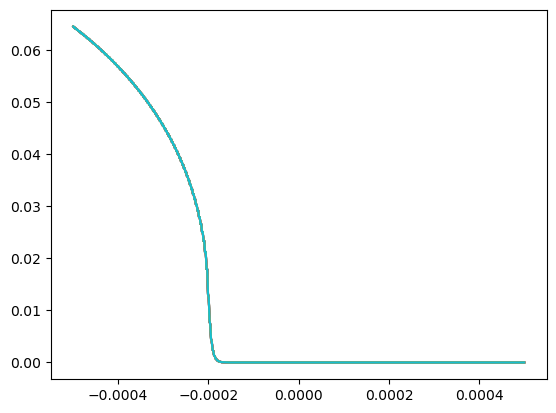

10-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b310>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b2b0>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b3d0>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b4f0>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b610>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b730>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b850>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3b970>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3ba90>
 PyObject <matplotlib.lines.Line2D object at 0x2acd3bbb0>

In [3]:
x,y,phi_flat = flatten_phi((T[:,:,:,end-1]),Nx,Ny,hx,hy)
plot(x .- Lx/2,phi_flat[:,Int64(round(Ny/2))])
# plot(x .- Lx/2,T[:, Int64(round(Ny/2))])
# CSV.write("Marshak.csv", (data=phi_flat[:,Int64(round(Ny/2))],))

In [4]:
function xi(n_)
    if n_ == 0
        return 1.231173
    elseif n_ == 3
        return 1.119935
    end
end

if n == 0
    marshak_nondim = DataFrame(CSV.File("Marshak_n0.csv", header=0));
    marshak_uncertain = DataFrame(CSV.File("Marshak_n0_uncertain.csv", header=0));
elseif n == 3
    marshak_nondim = DataFrame(CSV.File("Marshak_n3.csv", header=0));
end

factor = sqrt(Tfinal) / sqrt(3*(n+4)*sigma0*cv_val / (8*c*a*T0^(3)))
wave_estimate = xi(n) * factor

0.00045220304914982433

In [5]:
epsilon = 1/sigma0
Tval = (epsilon)^.25
print(epsilon)

9.260030928503302e-6

In [6]:
# float(marshak_nondim[:,1])

# x_marshak = marshak_nondim[:,1]  .* (sqrt(Tfinal) / sqrt(3*(n+4)*sigma0*cv_val / (8*c*a*T0^(3))))
# T_marshak = marshak_nondim[:,2] .* T0
# x_marshak_exp = marshak_uncertain[:,1]
# marshak_var = marshak_uncertain[:,2]
# marshak_T_un = marshak_uncertain[:,3] 

sqrt(3*(n+4)*sigma0*cv_val / (8*c*a*T0^(3)))

27.22611009179831

In [7]:
xf = xi(0) * sqrt(Tfinal) / 0.616057
correction(x,epsilon) = exp.(- sqrt(3) * (x .-xf)/epsilon * sigma0 .- sqrt(3) * xf * sigma0 /epsilon ) * Tval**4

LoadError: syntax: use "x^y" instead of "x**y" for exponentiation, and "x..." instead of "**x" for splatting.

In [8]:
correction(0.00001, 1)

LoadError: UndefVarError: correction not defined

(300, 5, 4, 1501)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


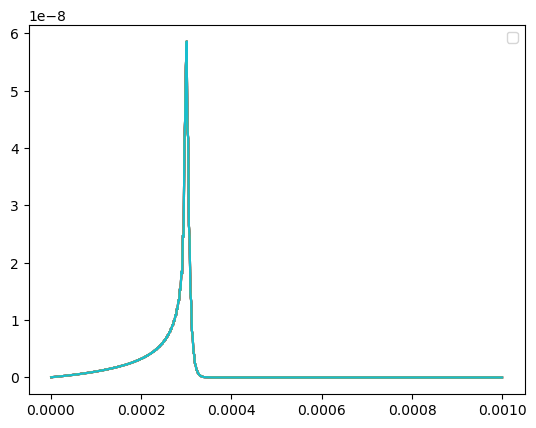

1

In [26]:
println(size(phi_sol))
xnew = (x .- Lx)
xlin = linspace(0, 0.001,100)

# plot(xnew, marshak_array)
# plot(xnew, marshak_wave(xnew[:]))
x,y,phi_flat = flatten_phi(phi_sol[:,:,:,end-1],Nx,Ny,hx,hy)
# plot(-(x .- Lx),((phi_flat[:,Int64(round(Ny/2))])/a/c).^.25, lw = 3)


# plot(-(x .- Lx),(phi_flat[:,Int64(round(Ny/2))]), lw=2)
# plot(x_marshak, T_marshak)
# plot(x_marshak_exp, marshak_T_un, label = "uncertainty")
# std = sqrt.(marshak_var)
# plot(x_marshak_exp, marshak_T_un + std)
# plot(x_marshak_exp, marshak_T_un - std)
# plot(x_marshak_exp - (marshak_var), marshak_T_un, label = "var")
# plot(x_marshak_exp + (marshak_var), marshak_T_un, label = "var")


# CSV.write("phi_cv1.csv", (data=phi_flat[:,Int64(round(Ny/2))],))
# CSV.write("x_cv1.csv", (data= x[:,1] .- Lx/2 ,))

x,y, T_flat = flatten_phi((T[:,:,:,end-1]),Nx,Ny,hx,hy)


# indices = findall(x-> abs(x - Tval) <= 0.0005, T_flat[:,Int64(round(Ny/2)) ])
# xbreak = (x)[indices[1]]



# plot((x ),(phi_flat[:,Int64(round(Ny/2))]/a/c))
plot((x ),-(T_flat[:,Int64(round(Ny/2))]).^4 + (phi_flat[:,Int64(round(Ny/2))]/a/c))
# plot(x, marshak_wave(x))

# correctionterm = correction(xlin, 4)
# plot(xlin .+ xbreak, correctionterm)


# scatter(x= (wave_estimate), y=0.0, label ="marshak estimate")
# scatter(x= (0.0002), y=0.0, label = "Jonas approximate")
# scatter(x= (0.000319634), y=0.0, label = "Uncertain Marshak guess")
# scatter(x= (0.000319628), y=0.0, label = " Uncertain Marshak a=0")
legend()
epsilon=1




In [10]:
indices = findall(x-> abs(x - Tval) <= 0.001, T_flat[:,Int64(round(Ny/2)) ])

12-element Vector{Int64}:
 66
 67
 68
 69
 70
 71
 72
 73
 74
 75
 76
 77

In [11]:
T_flat[indices[1], Int64(round(Ny/2))]

0.05591066073145073

In [12]:
xbreak = (x)[indices[1]]

0.00010916666666666666

In [13]:
T_flat[2]

0.06432817794240547

In [14]:
a*c

4.1157256

In [15]:
c

299.98

In [16]:
sum(w)

1.0

In [17]:



T0

0.08